In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn import linear_model
from sklearn.metrics import r2_score,accuracy_score

## Naïve Bayes Classifier

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
df2=pd.read_csv(r"/content/drive/MyDrive/ML Datasets/Salary_Data - Salary_Data.csv")
x2=df2.iloc[:,1:2]
y2=df2.iloc[:,2:3]
lin=linear_model.LinearRegression()
lin.fit(x2,y2)

poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x2)
poly.fit(x_poly,y2)
lin2=linear_model.LinearRegression()
lin2.fit(x_poly,y2)
pred=lin2.predict(x_poly)
print(pred)
r2=r2_score(y2,pred)
print("R2 score is: ",r2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML Datasets/Salary_Data - Salary_Data.csv'

In [ ]:
#Artificial Neural Network

from joblib.numpy_pickle_utils import xrange
from numpy import *

class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        random.seed(1)

        # Assign random weights to a 3 x 1 matrix,
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Train the neural network and adjust the weights each time.
    def train(self, inputs, outputs, training_iterations):
        for iteration in xrange(training_iterations):
            # Pass the training set through the network.
            output = self.learn(inputs)

            # Calculate the error
            error = outputs - output

            # Adjust the weights by a factor
            factor = dot(inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += factor

        # The neural network thinks.

    def learn(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":
    # Initialize
    neural_network = NeuralNet()

    # The training set.
    inputs = array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
    outputs = array([[1, 0, 1]]).T

    # Train the neural network
    neural_network.train(inputs, outputs, 10000)

    # Test the neural network with a test example.
    print(neural_network.learn(array([1, 0, 1])))

[0.9897704]


In [ ]:
#KNN
#(without lib)
from sklearn.datasets import load_iris
iris_data = load_iris()
x = iris_data.data
y = iris_data.target
print("name",iris_data.target_names)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

feature_means = np.mean(x_train, axis=0)
feature_stds = np.std(x_train, axis=0)

x_train_std = (x_train - feature_means) / feature_stds
x_test_std = (x_test - feature_means) / feature_stds

def knn_predict(x_train,y_train,x_test,k):
    predictions = []
    for test_point in x_test:
        distances = np.sqrt(np.sum((x_train - test_point)**2,axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]

        unique, counts = np.unique(nearest_labels, return_counts=True)
        prediction = unique[np.argmax(counts)]
        predictions.append(prediction)
    return np.array(predictions)
knn_predictions = knn_predict(x_train_std, y_train, x_test_std, k=3)
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)
print("knn_prediction: ", knn_predictions)
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,knn_predictions))
print("Classification Report: \n",metrics.classification_report(y_test,knn_predictions))

name ['setosa' 'versicolor' 'virginica']
Accuracy: 1.0
knn_prediction:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#KNN (with lib)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_std, y_train)
sklearn_predictions = knn.predict(x_test_std)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print("Accuracy:", sklearn_accuracy)
print("sklearn_prediction: ", sklearn_predictions)
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,sklearn_predictions))
print("Classification Report: \n",metrics.classification_report(y_test,sklearn_predictions))

Accuracy: 1.0
sklearn_prediction:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy: 0.9
Confusion Matrix: 
 [[10  1  0]
 [ 1 11  1]
 [ 0  0  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.85      0.88        13
           2       0.86      1.00      0.92         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.90        30
weighted avg       0.90      0.90      0.90        30



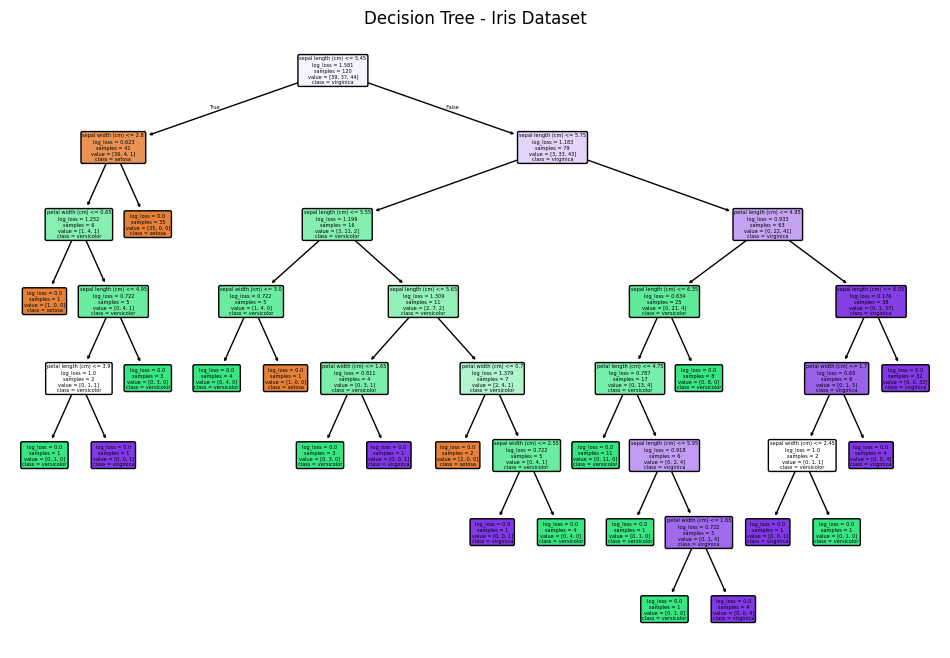

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
iris=datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
clf=DecisionTreeClassifier(max_features=1,criterion= "log_loss")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred))
print("Classification Report: \n",metrics.classification_report(y_test,y_pred))
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree - Iris Dataset")
plt.show()

##  Simple Linear Regression

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create sample data
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)  # Feature
y = np.array([2, 4, 5, 4, 5, 6])  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


## Multiple linear regression

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample data: two independent variables (features)
X = np.array([
    [1, 2],
    [2, 1],
    [3, 4],
    [4, 3],
    [5, 5],
    [6, 4]
])
y = np.array([3, 3, 7, 7, 10, 11])  # Dependent variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


##Lasso and Ridge Regression on California Housing Dataset

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

# === Train/Test Evaluation ===

# Lasso
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("=== Lasso Regression (Train/Test) ===")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))

# Ridge
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\n=== Ridge Regression (Train/Test) ===")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

# === k-Fold Cross-Validation ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation MSE (note: use neg_mean_squared_error, so we negate)
lasso_cv_mse = -cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_cv_mse = -cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')

# Cross-validation R²
lasso_cv_r2 = cross_val_score(lasso, X, y, cv=kf, scoring='r2')
ridge_cv_r2 = cross_val_score(ridge, X, y, cv=kf, scoring='r2')

# Report averaged CV metrics
print("\n=== Lasso Regression (5-Fold CV) ===")
print("Avg MSE:", np.mean(lasso_cv_mse))
print("Avg R² Score:", np.mean(lasso_cv_r2))

print("\n=== Ridge Regression (5-Fold CV) ===")
print("Avg MSE:", np.mean(ridge_cv_mse))
print("Avg R² Score:", np.mean(ridge_cv_r2))


=== Lasso Regression (Train/Test) ===
MSE: 0.6135115198058131
R² Score: 0.5318167610318159

=== Ridge Regression (Train/Test) ===
MSE: 0.5558034669932211
R² Score: 0.5758549611440126

=== Lasso Regression (5-Fold CV) ===
Avg MSE: 0.6059637217178132
Avg R² Score: 0.5447507927448502

=== Ridge Regression (5-Fold CV) ===
Avg MSE: 0.5305638379258751
Avg R² Score: 0.6013847228328231


##Logistic Regression

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
import numpy as np
import pandas as pd

# Load built-in dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("=== Logistic Regression on Breast Cancer Dataset ===")
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("TP:", TP, "TN:", TN, "FP:", FP, "FN:", FN)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1-Score:", f1)
print("AUC:", auc)

# 5-Fold Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
cv_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

print("\n=== 5-Fold Cross-Validation ===")
print("Average Accuracy:", np.mean(cv_accuracy))
print("Average AUC:", np.mean(cv_auc))


=== Logistic Regression on Breast Cancer Dataset ===
Accuracy: 0.956140350877193
Error Rate: 0.04385964912280704
TP: 70 TN: 39 FP: 4 FN: 1
Recall (Sensitivity): 0.9859154929577465
Specificity: 0.9069767441860465
Precision: 0.9459459459459459
F1-Score: 0.9655172413793104
AUC: 0.9977071732721913

=== 5-Fold Cross-Validation ===
Average Accuracy: 0.9543393882937432
Average AUC: 0.9916366632178948


In [ ]:
#svm

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score
)

# Load dataset
classification_data = load_breast_cancer()
X = pd.DataFrame(classification_data.data, columns=classification_data.feature_names)
y = pd.Series(classification_data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("SVM Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


SVM Classification Metrics:
Accuracy: 0.9737
TP: 70, TN: 41, FP: 2, FN: 1
Recall: 0.9859
Specificity: 0.9535
F1 Score: 0.9790
AUC: 0.9974


In [ ]:
#kmeans

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score,
    precision_score, f1_score, roc_auc_score
)
from scipy.stats import mode

# Load dataset
clustering_data = load_breast_cancer()
X = pd.DataFrame(clustering_data.data, columns=clustering_data.feature_names)
y_true = pd.Series(clustering_data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Map clusters to actual labels based on majority vote
mapped_labels = pd.Series(kmeans_labels)
mapping = {}
for cluster in [0, 1]:
    true_label = mode(y_true[mapped_labels == cluster], keepdims=True).mode[0]
    mapping[cluster] = true_label
mapped_preds = mapped_labels.map(mapping)

# Calculate metrics
conf_matrix = confusion_matrix(y_true, mapped_preds)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_true, mapped_preds)
recall = recall_score(y_true, mapped_preds)
precision = precision_score(y_true, mapped_preds)
specificity = TN / (TN + FP)
f1 = f1_score(y_true, mapped_preds)
auc = roc_auc_score(y_true, mapped_preds)

# Print results
print("K-Means Clustering with Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


K-Means Clustering with Metrics:
Accuracy: 0.9121
TP: 344, TN: 175, FP: 37, FN: 13
Recall: 0.9636
Specificity: 0.8255
F1 Score: 0.9322
AUC: 0.8945


In [ ]:
#hierarchical

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score,
    precision_score, f1_score, roc_auc_score
)
from scipy.stats import mode

# Load dataset
clustering_data = load_breast_cancer()
X = pd.DataFrame(clustering_data.data, columns=clustering_data.feature_names)
y_true = pd.Series(clustering_data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Map clusters to actual labels based on majority vote
mapped_labels = pd.Series(hierarchical_labels)
mapping = {}
for cluster in [0, 1]:
    true_label = mode(y_true[mapped_labels == cluster], keepdims=True).mode[0]
    mapping[cluster] = true_label
mapped_preds = mapped_labels.map(mapping)

# Calculate metrics
conf_matrix = confusion_matrix(y_true, mapped_preds)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_true, mapped_preds)
recall = recall_score(y_true, mapped_preds)
precision = precision_score(y_true, mapped_preds)
specificity = TN / (TN + FP)
f1 = f1_score(y_true, mapped_preds)
auc = roc_auc_score(y_true, mapped_preds)

# Print results
print("Hierarchical Clustering with Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Hierarchical Clustering with Metrics:
Accuracy: 0.8805
TP: 337, TN: 164, FP: 48, FN: 20
Recall: 0.9440
Specificity: 0.7736
F1 Score: 0.9084
AUC: 0.8588
